In [16]:
# Earlier we calculated the loss and accuracy but we have not addressed how to reduce the loss
# To reduce the loss we have to tweak the weights and biases to decrease the loss. Tweaking the
# weights and biases is the main tricky and difficult part of neural n/w's

In [17]:
# Our first is to randomly change the weights and biases , checking the loss and reapeating until
# we are happy with the lowest loss found.

In [27]:
# Dense Layer
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        #Initialize weights and biases
        #np.random.randn is a gaussian distribution which will provide values between -1 and 1 and 0.01 is multiplied to make the values smaller 
        # and close to each other thus fitting of data will be easier during training
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons) #To avoid transposing every time (inputs, neurons) is used rather than (neurons, inputs) 
        self.biases = np.zeros((1, n_neurons)) #default bias initialization
        pass
        
    def forward(self, inputs):
        #Calculate output values from inputs,weights and biases
        #print("Weights are = ",self.weights)
        #print("Biases are = ",self.biases)
        self.output = np.dot(inputs, self.weights) + self.biases
        pass

In [28]:
# Relu Activation
class Activation_ReLU:
    def activate(self, inputs):
        self.output = np.maximum(0,inputs)

In [29]:
# Softmax Activation
class Activation_Softmax:
    #Forward pass
    def activate(self, inputs):
        #Get unnormalized input batch (inputs - max(input)). It is done so that the values if they are bigger like in the order of 1000 then e^1000
        # calculation may fail as it can overflow. So keeping the inputs in a small -ve range will give a +ve output with values between 0 and 1
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))

        #Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output = probabilities

In [30]:
# Common Loss Class uses Cross Entropy Loss
class Loss:
    def calculate(self, output, y):

        # calculate sample losses
        sample_losses = self.forward(output, y)

        # calculate mean loss
        data_loss = np.mean(sample_losses)

        #return loss
        return data_loss

In [31]:
# Cross Entropy Loss
class Loss_CategoricalCrossEntropy(Loss):

    #Forward Pass

    def forward(self, y_pred, y_true):
        # No of samples in a batch
        samples = len(y_pred)

        # clip the data to avoid log(0) error
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        avg_loss = 0.0
        # checking whether the class target/real values are sparse labels or one hot encoded
        if(len(y_true.shape) == 1):
            output = []
            for targ_idx, distribution in zip(y_true, y_pred_clipped):
                output.append(distribution[targ_idx])

            loss_list = -np.log(output)
            #Calculating the Average loss
            avg_loss = np.mean(loss_list)
            #print("Avg Loss = ", avg_loss)
            
        elif(len(y_true.shape) == 2):
            outputs = []
            sum = 0
            for i in range(0,samples):
                sum = 0
                for k in range(0,len(y_true[0])):
                    sum = sum + y_true[i][k]*np.log(y_pred_clipped[i][k])
                outputs.append(sum)

            avg_loss = -1/N * np.sum(outputs)
            #print("Avg Loss = ",avg_loss)
        
        return avg_loss

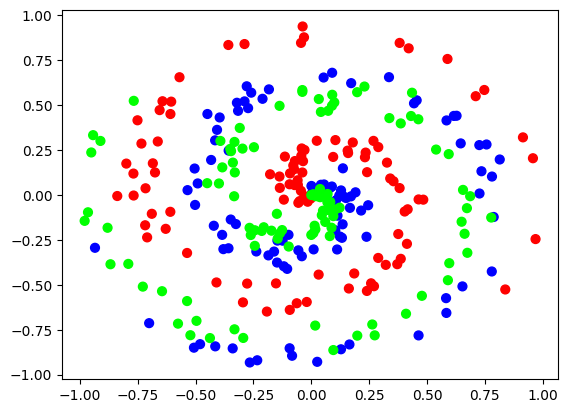

Input to the model are 
[[ 0.00000000e+00  0.00000000e+00]
 [ 2.99555692e-03  9.64660756e-03]
 [ 1.28809698e-02  1.55628482e-02]
 [ 2.99747903e-02  4.44809627e-03]
 [ 3.93124595e-02  9.32828337e-03]
 [ 8.28829070e-04  5.04982509e-02]
 [ 5.34835160e-02  2.85062827e-02]
 [ 4.17361967e-02  5.70752136e-02]
 [ 5.54633923e-02  5.87686822e-02]
 [ 8.16038325e-02  4.00659069e-02]
 [ 8.91875103e-02  4.74197045e-02]
 [ 1.07160836e-01 -2.93638241e-02]
 [ 1.21183202e-01 -2.64751446e-03]
 [ 1.28777727e-01  2.56794747e-02]
 [ 1.41112968e-01 -9.22449492e-03]
 [ 1.50579467e-01 -1.68126337e-02]
 [ 1.13476366e-01 -1.15077794e-01]
 [ 1.71552509e-01 -7.51816481e-03]
 [ 1.67186841e-01 -7.14591444e-02]
 [ 1.91325873e-01  1.50793232e-02]
 [ 1.36771902e-01  1.48679554e-01]
 [ 1.35606423e-01 -1.63114399e-01]
 [ 1.04024746e-01 -1.96370989e-01]
 [ 2.15633541e-01 -8.64653736e-02]
 [-9.83033329e-02 -2.21598670e-01]
 [ 2.46031418e-01 -5.68994507e-02]
 [ 1.24166250e-01 -2.31420174e-01]
 [ 1.32641941e-01 -2.38298729e-

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data, spiral_data

nnfs.init()
# Vertical Dataset
X,y = vertical_data(samples=100, classes=3)
# Spiral Dataset
# X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg')
plt.show()
print("Input to the model are ")
print(X)
print("The true/expected output ")
print(y)
# Create model
dense1 = Layer_Dense(2,3) #2 input 3 output
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3) # 3 input 3 output
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossEntropy()

In [40]:
# Helper variables to store the weights and biases at the lowest loss point
lowest_loss = 99999 #put the max value possible
print(lowest_loss)
best_dense1_weights = dense1.weights.copy()
best_dens1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dens2_biases = dense2.biases.copy()

99999


In [35]:
# now we will try to randomise the weigts and biases and will try to find out the min loss
# from the random set of weights and biases
# Approach 1 (update the weights with random values at each iteration to yeild better accuracy)
for iteration in range(100000):
    #Generate new set of weights and biases for each iteration
    dense1.weights = 0.05*np.random.randn(2,3)
    dense1.biases = 0.05*np.random.randn(1,3)
    dense2.weights = 0.05*np.random.randn(3,3)
    dense2.biases = 0.05*np.random.randn(1,3)

    #perform the forward pass through layer 1 and layer 2
    dense1.forward(X)
    activation1.activate(dense1.output)
    dense2.forward(activation1.output)
    activation2.activate(dense2.output)

    #perform the loss calculation on the output from layer 2
    loss = loss_function.calculate(activation2.output, y)

    # Calculate the accuracy with the output from the second layer.
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss

New set of weights found, iteration: 3361 loss: 1.0963014 acc: 0.3333333333333333
New set of weights found, iteration: 4001 loss: 1.0959858 acc: 0.3333333333333333
New set of weights found, iteration: 14598 loss: 1.0947443 acc: 0.3333333333333333


In [41]:
# With Approach 1 we can't find good weights and biases even after increasing the no of iterations 
# ,the loss slightly lowered and the accuray slightly increased but it was still not at par.
# So in Approach 2 we can update the weights and biases to the weights and biases that is yeilding
# a better result and then increasing the better weights and biases by a random amount to get a 
# better result. If that random increase is not yeilding a better result we revert back to the
# earlier best weights and biases and if it yeilding a better result we update it with the new 
# imporoved weights and biases.

#Approach 2
for iteration in range(100000):
    #Update the weights with small random value
    dense1.weights += 0.05*np.random.randn(2,3)
    dense1.biases += 0.05*np.random.randn(1,3)
    dense2.weights += 0.05*np.random.randn(3,3)
    dense2.biases += 0.05*np.random.randn(1,3)

    #perform the forward pass through layer 1 and layer 2
    dense1.forward(X)
    activation1.activate(dense1.output)
    dense2.forward(activation1.output)
    activation2.activate(dense2.output)

    #perform the loss calculation on the output from layer 2
    loss = loss_function.calculate(activation2.output, y)

    # Calculate the accuracy with the output from the second layer.
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)

    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    # Revert the weights and biases to the previous best weights and biases.
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008677 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0994315 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0991219 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986339 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0986199 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0984716 acc: 0.36333333333333334
New set of weights found, iteration: 18 loss: 1.0983391 acc: 0.3333333333333333
New set of weights found, iteration: 27 loss: 1.0982698 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0982264 acc: 0.37333333333333335
New set of weights found, iteration: 35 loss: 1.0979562 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0977433 acc: 0.3433333333333333
New set of weights found, iteration: 37 loss: 1.0976934 acc: 0.3333333333333333
New set of weights found, iteration: 44 loss

In [ ]:
# with Approach 2 the loss fell down significantly but we have to see whether this model of 
# approach will work for any data sets. Lets try out with a spiral data set rather than vertical
# data set.

# With the spiral dataset we are getting a loss of 1.079 and accuracy of 0.396
# which is much less than the accuracy that was observed in the vertical dataset 
# were loss = 0.1727 and accuracy = 0.933